# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataframe

In [2]:
evdata = pd.read_csv(r'C:\Users\El\Desktop\Electric-Vehicles-EDA\Data\evcleaned.csv')

In [3]:
evdata.head()

,Unnamed: 0,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


# Analysis

## Market Penetration and Distribution:

### How is the distribution of electric vehicles (EVs) across different counties and cities?

<Axes: xlabel='County'>

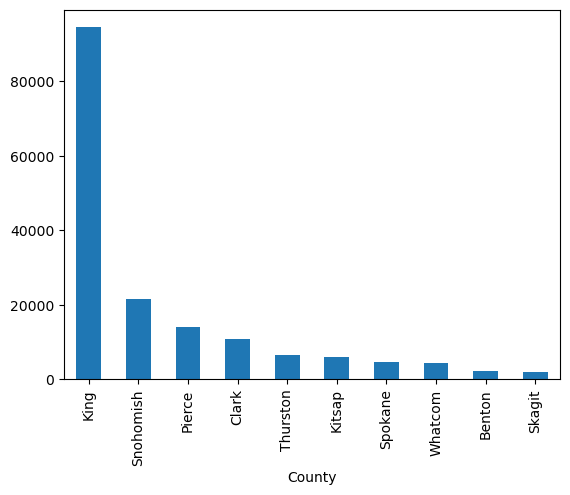

In [4]:
evdata.groupby('County').count()['VIN (1-10)'].sort_values(ascending = False).head(10).plot.bar()

<Axes: xlabel='City'>

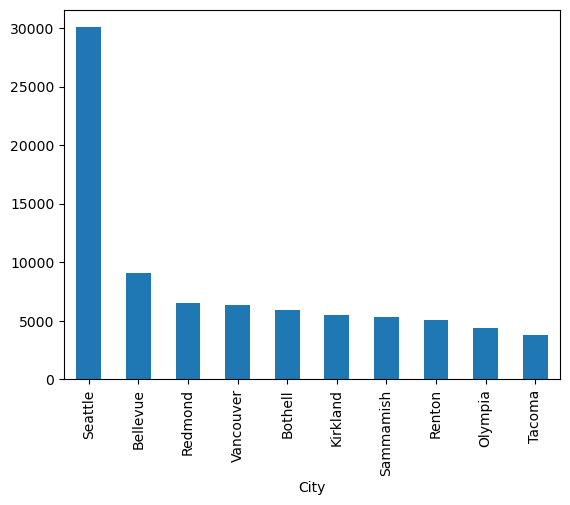

In [5]:
evdata.groupby('City').count()['VIN (1-10)'].sort_values(ascending = False).head(10).plot.bar()

### Which electric vehicle types (BEV or PHEV) are most popular ?

<Axes: xlabel='Electric Vehicle Type'>

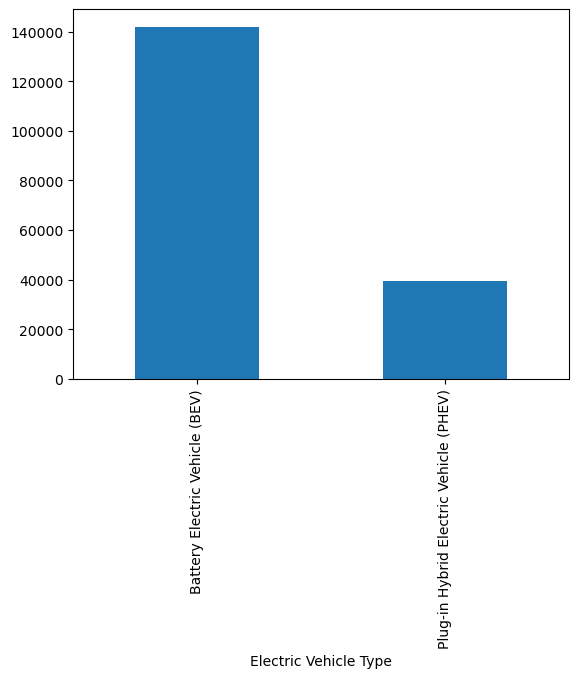

In [6]:
evdata.groupby('Electric Vehicle Type').count()['VIN (1-10)'].plot.bar()

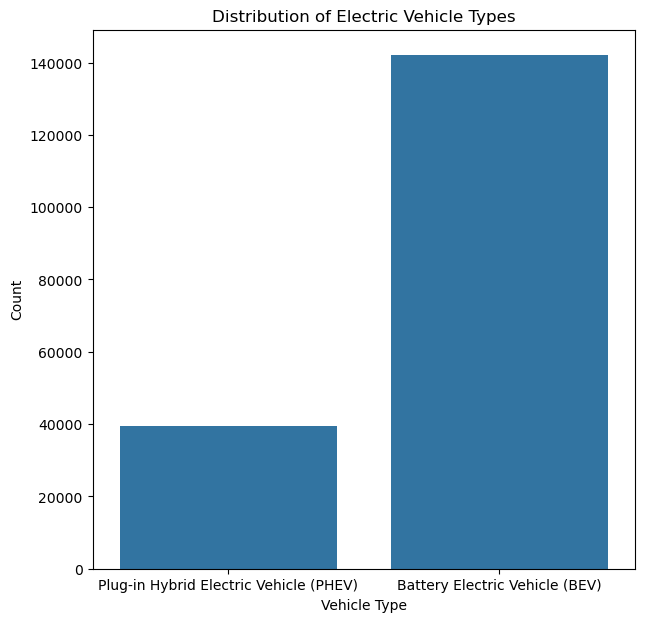

In [7]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Electric Vehicle Type', data=evdata)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

## Market Trends and Preferences

In [8]:
evdata.head(3)

,Unnamed: 0,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10


### What are the most popular makes and models of EVs?

In [9]:
#evdata.groupby('Make').count()['VIN (1-10)'].sort_values(ascending = False).head(5)
evdata['Make'].value_counts().head(10)

TESLA         80819
NISSAN        14037
CHEVROLET     13864
FORD           9527
BMW            7680
KIA            7642
TOYOTA         6519
VOLKSWAGEN     5163
JEEP           4690
HYUNDAI        4561
Name: Make, dtype: int64

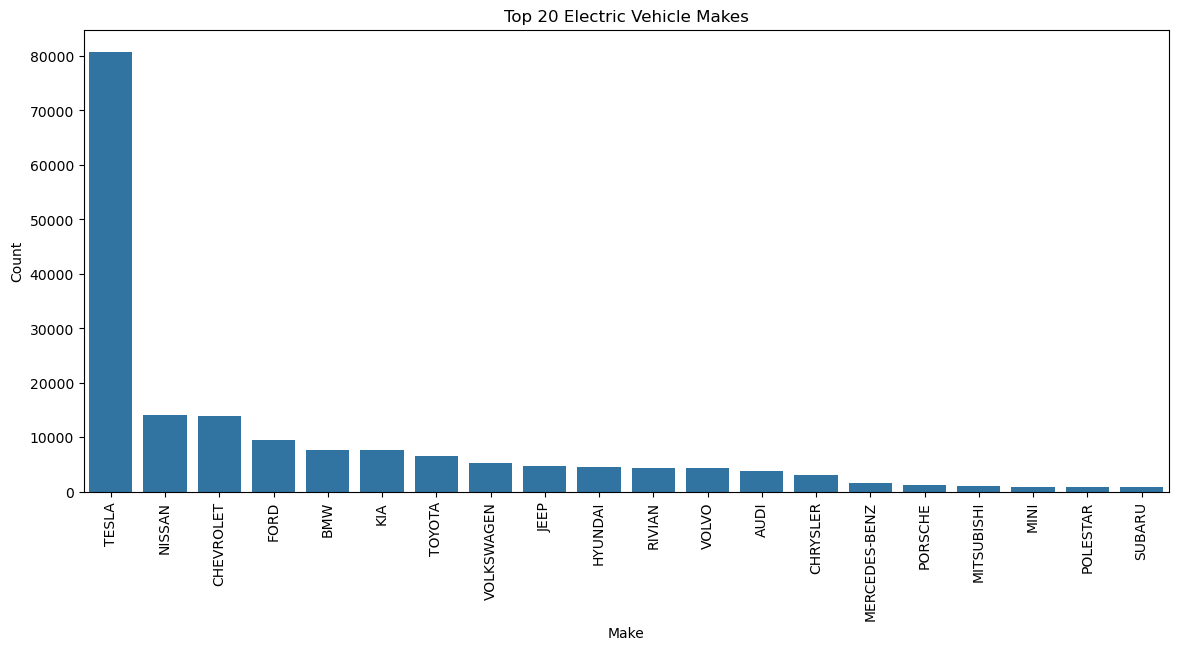

In [10]:
plt.figure(figsize=(14, 6))
make_counts = evdata['Make'].value_counts().nlargest(20)  # Top 20 makes
sns.barplot(x=make_counts.index, y=make_counts.values)
plt.title('Top 20 Electric Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [11]:
#evdata.groupby('Model').count()['VIN (1-10)'].sort_values(ascending = False).head(5)
evdata['Model'].value_counts().head(10)

MODEL Y           37007
MODEL 3           30150
LEAF              13356
MODEL S            7731
BOLT EV            6935
MODEL X            5883
VOLT               4798
ID.4               4091
WRANGLER           3543
MUSTANG MACH-E     3487
Name: Model, dtype: int64

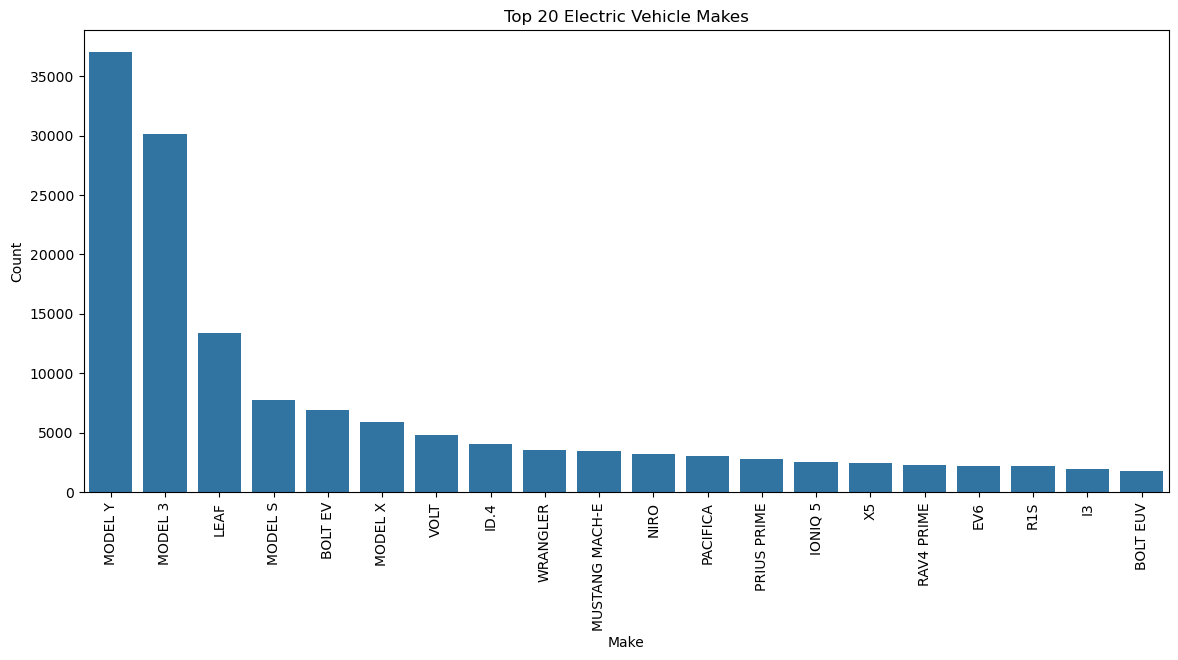

In [12]:
plt.figure(figsize=(14, 6))
make_counts = evdata['Model'].value_counts().nlargest(20)  # Top 20 makes
sns.barplot(x=make_counts.index, y=make_counts.values)
plt.title('Top 20 Electric Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### What is the distribution of EVs through the years?

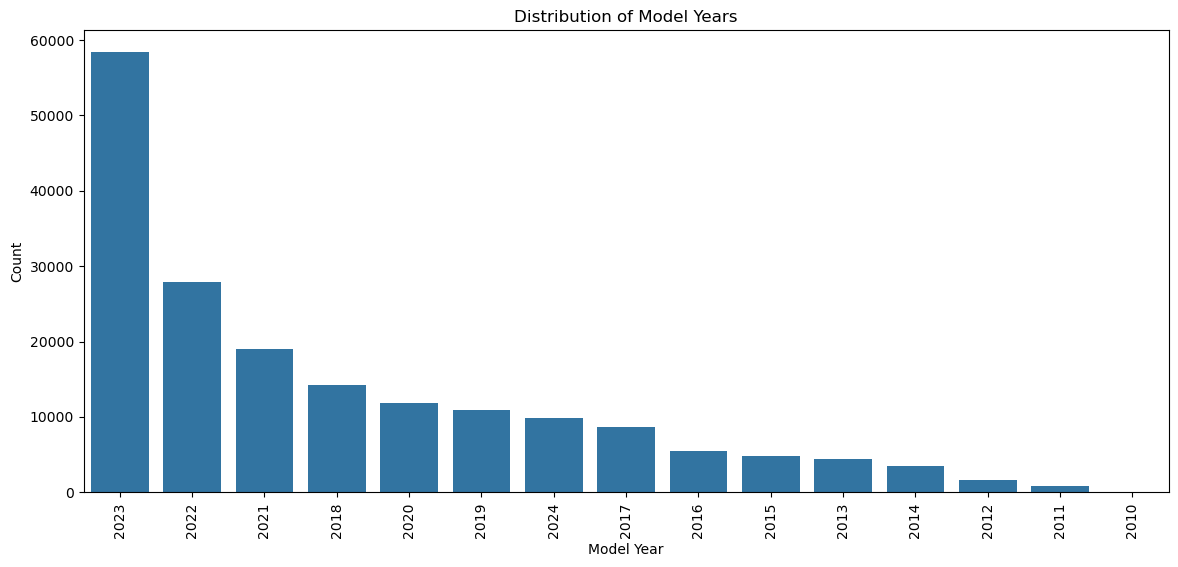

In [13]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Model Year', data=evdata, order=evdata['Model Year'].value_counts().head(15).index)
plt.title('Distribution of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### What is the distribution of electric range of vehicles preffered?

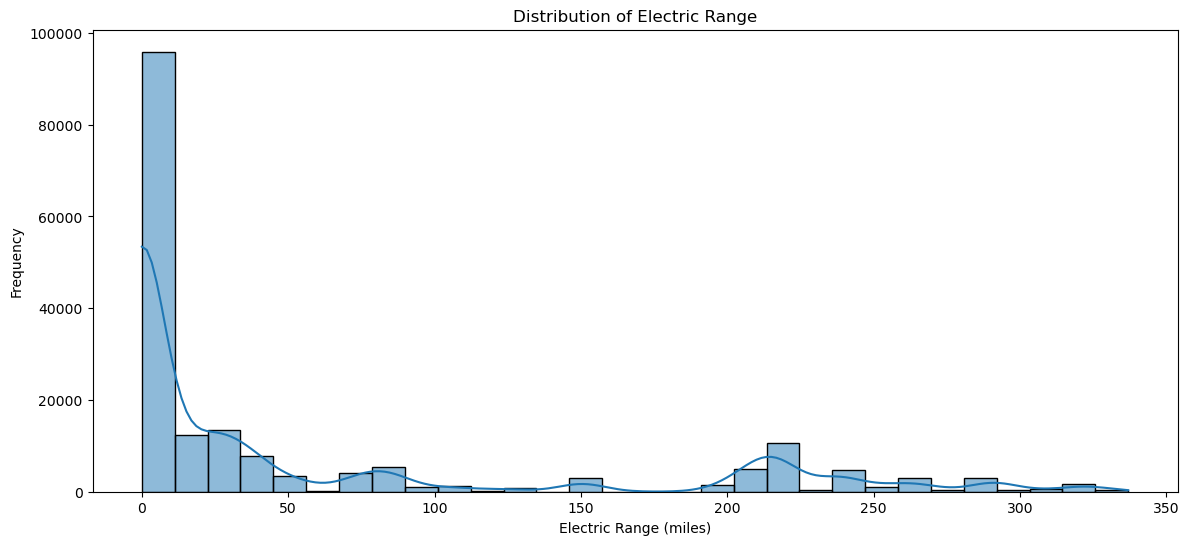

In [14]:
plt.figure(figsize=(14, 6))
sns.histplot(evdata['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

### Market Share between EV models ?

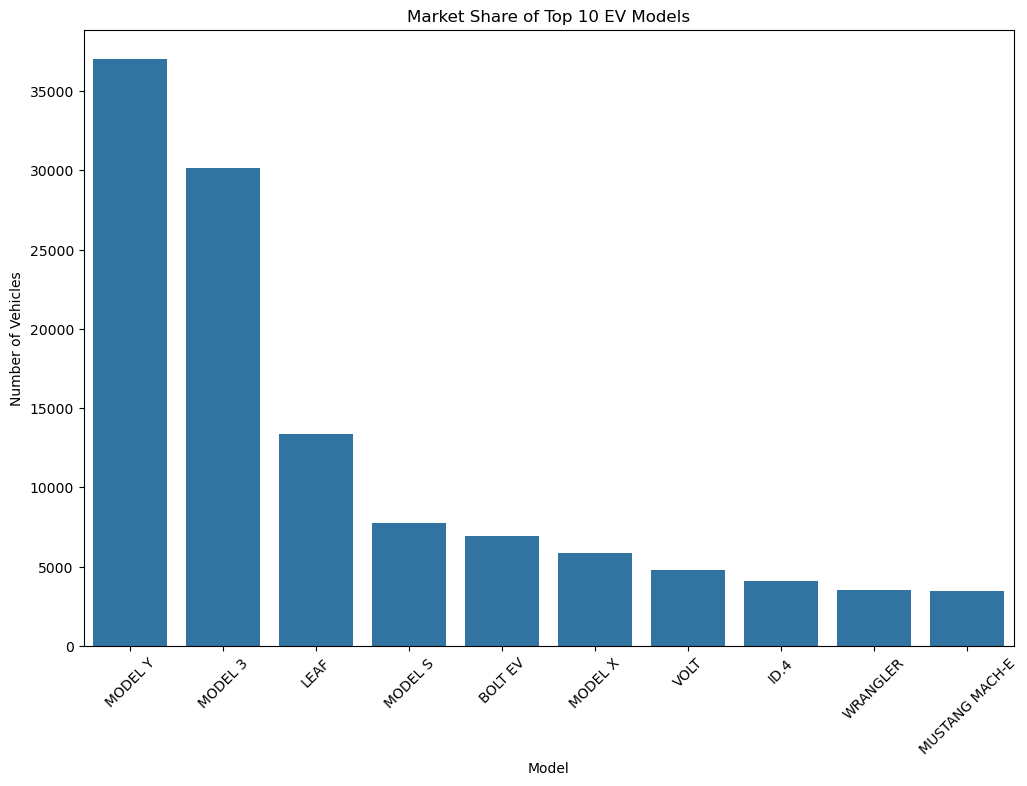

In [16]:
plt.figure(figsize=(12, 8))
top_models = evdata['Model'].value_counts().nlargest(10)
sns.barplot(x=top_models.index, y=top_models.values)
plt.title('Market Share of Top 10 EV Models')
plt.xlabel('Model')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()